In [1]:
from IPython.display import display
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_blobs
%matplotlib inline

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, 
    cancer.target, 
    
    stratify=cancer.target, 
    # stratify: cancer.target데이터의 비율을 살펴서 split해줌으로써 지나치게 특정 라벨의 데이터만 들어가는 것을 사전에 방지한다.
    
    random_state=66
)

### 2.3.7 커널 서포트 벡터 머신

- 커널 서포트 벡터 머신은, 데이터셋에 비선형 특성을 추가하여 선형 모델을 강력하게 만드는 기법이다.
- 분류와 회귀에 모두 사용 가능

#### 선형 모델과 비선형 특성

Text(0,0.5,'Feature 1')

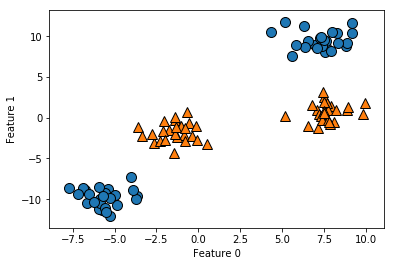

In [2]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

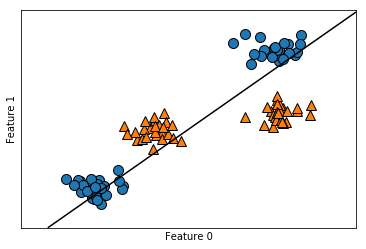

In [3]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- LinearSVC(); 선형 SVM
- LinearSVC로는 데이터셋을 나눌 수 없다.

- 원본 데이터셋에 비선형 특성을 추가하여 선형모델(LinearSVC)을 그대로 사용하는 방법

In [4]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2]) # 원래 있던 특성 중 하나에 제곱을 하여 새로운 특성으로 추가한다. --> 특성 공학
print("X - Data shape: {}".format(X.shape))
print(X[0])
print(X[1])
print(X[2])
print()

print("X_new - Data shape: {}".format(X_new.shape))
print(X_new[0])
print(X_new[1])
print(X_new[2])

X - Data shape: (100, 2)
[-1.72161036 -1.48033142]
[-3.6573384 -9.5482383]
[ 7.0778163   0.99508772]

X_new - Data shape: (100, 3)
[-1.72161036 -1.48033142  2.19138111]
[ -3.6573384   -9.5482383   91.16885455]
[ 7.0778163   0.99508772  0.99019957]


Text(0.5,0,'feature1 ** 2')

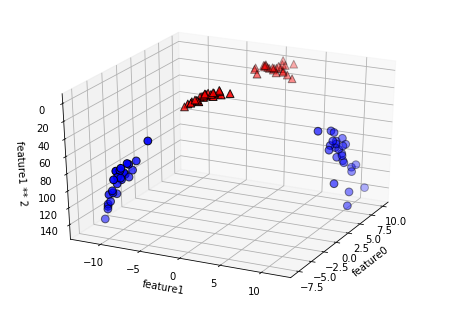

In [5]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y==0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

In [6]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
print("coef shape:", coef.shape)
print(coef)
print("intercept shape:", intercept.shape)
print(intercept)

coef shape: (3,)
[ 0.1147033  -0.19338766 -0.05352404]
intercept shape: (1,)
[ 1.15157865]


In [7]:
# show linear decision boundary
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
print("xx shape:", xx.shape)
print("yy shape:", xx.shape)
print(xx[0], xx[1], "...", xx[-1])
print(yy[0], yy[1], "...", yy[-1])

print()

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
print("XX shape:", XX.shape)
print("YY shape:", YY.shape)
print("ZZ shape:", ZZ.shape)
print(XX[0])
print(XX[1])
print(XX[-1])

print(YY[0])
print(YY[1])
print(YY[-1])

xx shape: (50,)
yy shape: (50,)
-9.7406465808 -9.29840934402 ... 11.9289780217
-14.1188069772 -13.549430354 ... 13.7806475598

XX shape: (50, 50)
YY shape: (50, 50)
ZZ shape: (50, 50)
[ -9.74064658e+00  -9.29840934e+00  -8.85617211e+00  -8.41393487e+00
  -7.97169763e+00  -7.52946040e+00  -7.08722316e+00  -6.64498592e+00
  -6.20274869e+00  -5.76051145e+00  -5.31827421e+00  -4.87603698e+00
  -4.43379974e+00  -3.99156250e+00  -3.54932527e+00  -3.10708803e+00
  -2.66485079e+00  -2.22261356e+00  -1.78037632e+00  -1.33813908e+00
  -8.95901845e-01  -4.53664608e-01  -1.14273715e-02   4.30809865e-01
   8.73047102e-01   1.31528434e+00   1.75752158e+00   2.19975881e+00
   2.64199605e+00   3.08423329e+00   3.52647052e+00   3.96870776e+00
   4.41094500e+00   4.85318223e+00   5.29541947e+00   5.73765671e+00
   6.17989394e+00   6.62213118e+00   7.06436842e+00   7.50660565e+00
   7.94884289e+00   8.39108013e+00   8.83331736e+00   9.27555460e+00
   9.71779184e+00   1.01600291e+01   1.06022663e+01   1.1

Text(0.5,0,'feature1 ** 2')

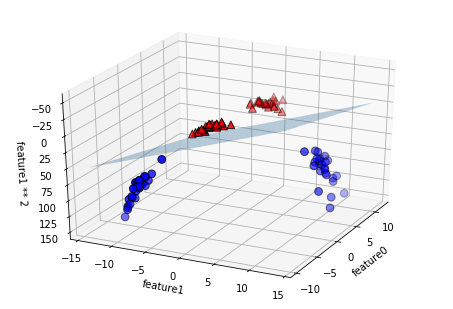

In [8]:
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)

ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

In [9]:
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.c_.html
type(np.c_)

numpy.lib.index_tricks.CClass

In [10]:
print(XX.ravel()[0], XX.ravel()[1], "...", XX.ravel()[-1])
print(YY.ravel()[0], YY.ravel()[1], "...", YY.ravel()[-1])
print(ZZ.ravel()[0], ZZ.ravel()[1], "...", ZZ.ravel()[-1])

print()

c = np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()]
print(c.shape)
print(c[0])
print(c[1])
print(c[-1])

-9.7406465808 -9.29840934402 ... 11.9289780217
-14.1188069772 -14.1188069772 ... 13.7806475598
51.6533812933 52.6011063658 ... -2.71159310986

(2500, 3)
[ -9.74064658 -14.11880698  51.65338129]
[ -9.29840934 -14.11880698  52.60110637]
[ 11.92897802  13.78064756  -2.71159311]


Text(0,0.5,'Feature 1')

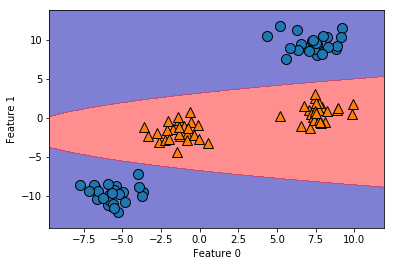

In [11]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### The Kernel Trick
- 원본 데이터 특성에 비선형 특성을 추가하여 선형모델을 강력하게 만드는 방법의 단점
  - 어떤 특성을 선택하여 비선형 특성을 만들지 선택해야 하는 문제 발생
  - 많은 비선형 특성 추가에 따른 연산 비용 증가
- Kernel Trick (커널 기법)
  - 새로운 특성을 만들지 않고 
  - 실제로 데이터 특성을 확장하지 않고, 확장된 특성에 대한 데이터 포인트들의 거리를 계산
  - 커널의 종류
    - 다항식 커널
      - 모든 원본 데이터 특성들에 대하여 가능한 조합을 지정된 차수까지 모두 계산
        - 예: $특성1^2 \times 특성2^5$
    - RBF (Radial Basis Function) or Gaussian (가우시안)
      - 모든 원본 데이터 특성을 무한한 특성 공간에 매핑
      - 즉, 모든 차수의 모든 다항식을 고려
        - 일반적으로 고차항이 될 수록 특성의 중요도는 떨어지게됨
<br/>
<br/>

#### Understanding SVMs
- Support Vectors
  - 주어진 훈련 데이터들 중 두 클래스 사이의 경계에 위치한 데이터 포인트들 --> 결정 경계를 만드는데 영향을 주는 포인트들
  - RBF 커널 (가우시안 커널) 에서의 데이터 포인트 $x_1$과 $x_2$ 사이 거리
    - $k_{rbf}(x_1, x_2 )=exp(-\gamma||x_1 - x_2 ||^2 )$
    - $\gamma$ : 가우시안 커널의 폭을 제어하는 매개변수

[[  8.1062269    4.28695977]
 [  9.50169345   1.93824624]
 [ 11.563957     1.3389402 ]
 [ 10.24028948   2.45544401]
 [  7.99815287   4.8525051 ]]
[[-10.          -6.25178295  -3.73381586  10.           9.98559881]]


Text(0,0.5,'Feature 1')

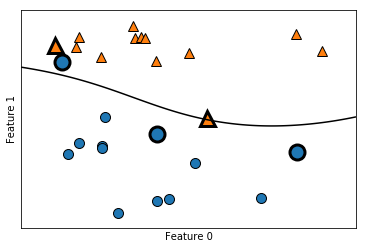

In [12]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# plot support vectors
sv = svm.support_vectors_
dual_coef = svm.dual_coef_
print(sv)
print(dual_coef)
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = dual_coef.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### Tuning SVM parameters
- SVC(kernel='rbf', C=10, gamma=0.1) 에서 각 매개변수 튜닝
  - gamma
    - 가우시안 커널 폭($\gamma$)의 역수
    - 훈련 샘플 데이터가 미치는 영향의 범위 결정
    - gamma값이 커짐 -->  $\gamma$이 작아짐 --> 가우시안 커널의 반경이 작아짐 --> 모델의 복잡도가 높아짐
    - gamma값이 작아짐 -->  $\gamma$이 커짐 --> 가우시안 커널의 반경이 커짐 --> 모델의 복잡도가 낮아짐
  - C (Regulation, 규제 변수)
    - C가 커짐 --> 샘플 데이터의 자유도가 작아짐 (제약이 작아짐) --> 샘플 데이터가 모델에 많은 영향을 줌 --> 모델의 복잡도가 높아짐
    - C가 작아짐 --> 샘플 데이터의 자유도가 커짐 (제약이 커짐) --> 샘플 데이터가 모델에 적은 영향을 줌 --> 모델의 복잡도가 낮아짐

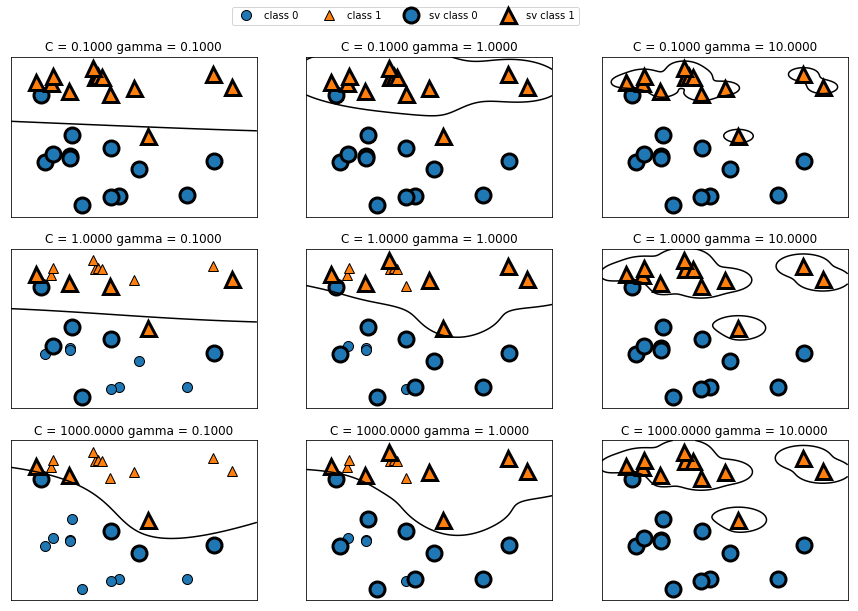

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.63


Text(0,0.5,'Feature magnitude')

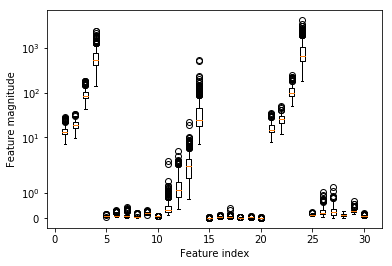

In [15]:
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

##### Preprocessing data for SVMs

- SVM에서는 특히 각 특성값의 범위가 비슷해지도록 정규화하는 것 매우 중요
- 정규화 식
$$\frac{X-min(X)}{max(X)-min(X)}$$

In [16]:
# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Maximum for each feature
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


- [NOTE] 테스트 데이터 세트에 대해서도 동일한 정규화를 하지만, 훈련 데이터 세트에서 계산된 최소값과 최대값과 해당 범위를 사용

In [17]:
# use THE SAME transformation on the test set,
# using min and range of the training set. See Chapter 3 (unsupervised learning) for details.
X_test_scaled = (X_test - min_on_training) / range_on_training

In [18]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
        svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.948
Accuracy on test set: 0.951


In [19]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


#### Strengths, weaknesses and parameters
- SVM 장점
  - 다양한 데이터셋에 대해서도 잘 작동하는 강력한 모델
  - 데이터의 특성이 몇 개 되지 않더라도 복잡한 결정 경계 생성 가능
- SVM 단점
  - 샘플 데이터 개수가 너무 많을 때 성능이 오히려 떨어질 수 있음
  - 데이터 전처리와 매개변수 설정에 신경을 많이 써야 함